# Python: Introduction to KNN

**Goal**: understand how the k-nearest neighbor algorithm works and how to implement it!

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduice-the-dataset" data-toc-modified-id="Introduice-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduice the dataset</a></span></li><li><span><a href="#KNN-algorithm" data-toc-modified-id="KNN-algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>KNN algorithm</a></span><ul class="toc-item"><li><span><a href="#Theory-behind-KNN" data-toc-modified-id="Theory-behind-KNN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Theory behind KNN</a></span></li><li><span><a href="#KNN-algorithm-implementation" data-toc-modified-id="KNN-algorithm-implementation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>KNN algorithm implementation</a></span><ul class="toc-item"><li><span><a href="#Step-1:-compute-the-euclidean-distance" data-toc-modified-id="Step-1:-compute-the-euclidean-distance-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Step 1: compute the euclidean distance</a></span></li><li><span><a href="#Step-2:-get-nearest-neighbors" data-toc-modified-id="Step-2:-get-nearest-neighbors-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Step 2: get nearest neighbors</a></span></li><li><span><a href="#Step-3:-make-predictions" data-toc-modified-id="Step-3:-make-predictions-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Step 3: make predictions</a></span></li><li><span><a href="#Step-4:-determine-accuracy-of-predictions" data-toc-modified-id="Step-4:-determine-accuracy-of-predictions-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Step 4: determine accuracy of predictions</a></span></li><li><span><a href="#Step-5:-put-all-together-in-a-KNN-class" data-toc-modified-id="Step-5:-put-all-together-in-a-KNN-class-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Step 5: put all together in a KNN class</a></span></li></ul></li></ul></li><li><span><a href="#Applications" data-toc-modified-id="Applications-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Applications</a></span><ul class="toc-item"><li><span><a href="#Euclidean-distance" data-toc-modified-id="Euclidean-distance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Euclidean distance</a></span></li><li><span><a href="#Computation-of-the-euclidean-distance-for-all-observations" data-toc-modified-id="Computation-of-the-euclidean-distance-for-all-observations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Computation of the euclidean distance for all observations</a></span></li><li><span><a href="#Randomization-and-sorting" data-toc-modified-id="Randomization-and-sorting-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Randomization and sorting</a></span></li><li><span><a href="#Average-price-computation" data-toc-modified-id="Average-price-computation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Average price computation</a></span></li><li><span><a href="#Put-all-together-in-a-function-to-make-predictions" data-toc-modified-id="Put-all-together-in-a-function-to-make-predictions-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Put all together in a function to make predictions</a></span></li></ul></li><li><span><a href="#Evaluate-model-performance" data-toc-modified-id="Evaluate-model-performance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluate model performance</a></span><ul class="toc-item"><li><span><a href="#Test-the-quality-of-predictions" data-toc-modified-id="Test-the-quality-of-predictions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test the quality of predictions</a></span></li><li><span><a href="#Error-metrics" data-toc-modified-id="Error-metrics-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Error metrics</a></span><ul class="toc-item"><li><span><a href="#MAE-(Mean-Absolute-Error)" data-toc-modified-id="MAE-(Mean-Absolute-Error)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>MAE (Mean Absolute Error)</a></span></li><li><span><a href="#MSE-(Mean-Square-Error)" data-toc-modified-id="MSE-(Mean-Square-Error)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>MSE (Mean Square Error)</a></span></li></ul></li><li><span><a href="#Training-another-model" data-toc-modified-id="Training-another-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Training another model</a></span></li><li><span><a href="#Root-mean-square-error-(RMSE)" data-toc-modified-id="Root-mean-square-error-(RMSE)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Root mean square error (RMSE)</a></span></li><li><span><a href="#Errors-comparison" data-toc-modified-id="Errors-comparison-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Errors comparison</a></span></li></ul></li></ul></div>

## Introduice the dataset

The columns of our dataset are described as follows:

* host_response_rate: the response rate of the host
* host_acceptance_rate: number of requests/requests to the host that convert
* host_listings_count: number of other homes of the host
* latitude: latitude (coordinate of the home)
* longitude: longitude
* city: the city where the accommodation is located
* zipcode: the postal code of the accommodation
* state: the region of the accommodation
* accommodates: the number of guests the accommodation can host
* room_type: the type of accommodation (Private room, Shared room or Entire home/apt)
* bedrooms: number of bedrooms included in the accommodation
* bathrooms: number of bathrooms included in the accommodation
* beds: number of beds included in the accommodation
* price: price per night
* cleaning_fee: additional cost for cleaning
* security_deposit: security deposit, in case of damage
* minimum_nights: minimum number of nights for the rental
* maximum_nights: maximum number of nights for the rental
* number_of_ reviews: number of reviews left by users

In this section, we will try to answer the following questions:

* read the file 'paris_airbnb.csv' in a dataframe named paris_listings
* display the first row of paris_listings

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
paris_listings = pd.read_csv('paris_airbnb.csv')
paris_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,100%,NaN,1.0,48.83349,2.31852,Paris,75014,Île-de-France,2,Entire home/apt,0.0,1.0,0.0,$75.00,$50.00,$0.00,3,15,8
1,100%,NaN,1.0,48.85100,2.35869,Paris,75004,Ile-de-France,2,Entire home/apt,0.0,1.0,1.0,$115.00,$36.00,$0.00,1,90,173
2,100%,NaN,2.0,48.85758,2.35275,Paris,75004,Île-de-France,4,Entire home/apt,2.0,1.0,2.0,$115.00,$50.00,$200.00,10,23,243
3,100%,NaN,1.0,48.86528,2.39326,Paris,75020,Ile-de-France,3,Entire home/apt,1.0,1.0,1.0,$90.00,NaN,NaN,3,365,1
4,67%,NaN,3.0,48.85899,2.34735,Paris,75001,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,$75.00,$200.00,"$1,500.00",180,365,0


## KNN algorithm

In this section, first, we will start by talking about ``the k-nearest neighbor theory``, next, we will discuss how to ``implement the algorithm`` from scratch.

### Theory behind KNN

K Nearest Neighbors is a simple machine learning model that makes predictions based on the most similar observations in its training data. Although it can be very powerful, its predictive ability is limited to observations that are similar to the training data it has in memory.

Unlike most other models, KNN does not learn from its training data set. Instead, it keeps the training data set in memory and then compares the new observation to the stored data. KNN does not do any work until a prediction is needed.

When a prediction is needed, it does exactly what its name says. The model examines the new observation and finds the most similar records (nearest neighbors) that it holds in its training set. The number of neighbors (k) that the model selects from its training data is defined by the user. A prediction can be made either by returning the most common result (classification) or by taking the mean (regression).

KNN is a simple model to implement, but as a result it is limited in the types of data it can take as input. When working with KNN, the phrase "garbage in, garbage out" has never been more accurate. KNN does not handle categorical variables, so everything must be preprocessed to include only numeric values.

Also, as you will see in the next section, nearest neighbors are found by calculating the distances between the new observation and the records kept in memory. Those with the smallest distances are considered the most similar. Intuitively, you should understand the importance of scaling your data (so that they are all measured in the same metric) before running a KNN model.

### KNN algorithm implementation

Now that we understand the theory behind KNN, we can discuss how to implement the algorithm from scratch in five steps:

* step 1: compute the euclidean distance

* step 2: get nearest neighbors

* step 3: make predicitons

* step 4: determine accuracy of predictions

* step 5: put all together in a KNN class

#### Step 1: compute the euclidean distance

The formula for euclidean Distance is: $\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}$. Euclidean distance may seem complicated, and the formula may seem intimidating. But the concept is very simple. The euclidean distance is the ordinary straight-line distance between two data points. The formula can be simply derived from the Pythagorean formula: $z^{2}=x^{2}+y^{2}$. Where c is the euclidean distance between data points x and y.

For simplicity, let's say that data points a and b are 2-Dimensional and described by their x and y coordinates: $\mathrm{x}=\left(x_{1}, x_{2}\right)$ and $\mathrm{y}=\left(y_{1}, y_{2}\right)$. To help with understanding, visually we can view this on a graph. On the graph below data points a and b have been ploted (represented by the large arrowheads). The euclidean distance we are trying to calculate is the vector drawn in yellow. By drawing in the vectors representing the data points (in blue and red) we can clearly see that the yellow euclidean distance is simply the hypotenuse of the triangle.

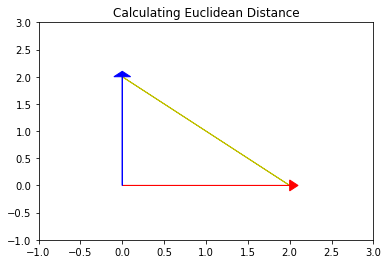

In [3]:
# Coordinate Pairs for where the datapoints are (represented by the arrowheads at the end of the vectors)

# Datapoint a
red = (2, 0)

# Datapoint b
blue = (0, 2)

# Axis bounds
plt.xlim(-1,3)          
plt.ylim(-1,3)

# Plot vectors
plt.arrow(0, 2, 2, -2, head_width=.02, head_length=0.01, color = 'y')
plt.arrow(0, 0, 2, 0, head_width=.2, head_length=0.1, color = 'r')
plt.arrow(0, 0, 0, 2,  head_width=.2, head_length=0.1, color = 'b')
plt.title('Calculating Euclidean Distance')
plt.show()

We know that the length of the vectors for point a and b can be calculated by $\left|x_{1}-y_{1}\right|$ and $\left|x_{2}-y_{2}\right|$. So it follows that, $z^{2}=\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}$ that leads to $z=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}$. This is the basic formula for euclidean distance for 2-D datapoints. However, this can be expanded to 3-D and beyond leaving us with the finalized formula of euclidean distance we saw above: $z=\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}+\left(x_{3}-y_{3}\right)^{2}+\ldots+\left(x_{n}-y_{n}\right)^{2}}$. More succintly written as, $\sum_{i=1}^{n}\left(x_{i}-y_{i}\right)^{2}$.

When working with datasets, each row is a datapoint. Each column represents another dimension of the datapoint. To calculate the Euclidean distance between two points we can use the following function.

```Python
# Helper method to calculate the square root
def sq_rt(x):
  return x** 0.5

# Calculate the Euclidean distance between two vectors (datapoints)
def euclidean_distance(row_1, row_2):     # For datapoint row 1 and datapoint row 2
  # Save a distance variable to save sum of calculations to
  distance = 0.0
  # Itereate through each column of the row
  # Except for the last column which is where the target varibale is stored
  for i in range(len(row_1)-1):
    # Calculate the length vectors for each dimension and sum them
    distance += (row_1[i]- row_2[i])**2
  # Return the square root of the sum of the distances
  return sq_rt(distance)
```

The function above assumes that the output target is the last column of the datapoint and is therefore not included in the distance calculations. In the final KNN class we will have a fit method that saves the X values and the target Y separately.

#### Step 2: get nearest neighbors

Now that we know how to calculate the distance betweeen two datapoints, we can find the k nearest neighbors (closest instances in the training data) to our new datapoint.

First we can use the above function to calculate the distances between our new observation and each datapoint in our training set. Once calculated, we can sort these distances and return the instances with the smallest calculated distances.

The below function get_KNN() will implement this idea in python.

```Python
# Return the k nearest neighbors to the new observation

# Input is the training data, test observation, and the number of neighbors (k) to return
def get_KNN(train, test_row, k):
  # Save the rows and calculated distances in a tuple
  distances = list()

  # Iterate through each row in the training data
  # Use the euclidean distance function to calculate the distances between the train row 
  # and the new observation
  for train_row in train:
    euc_dist = euclidean_distance(test_row, train_row)
    # Save the row and calculated distance
    distances.append((train_row, euc_dist))

  # Sort by using the calculated distances (the second item in the tuple)
  distances.sort(key= lambda tup: tup[1])
  
  # Populate a list with k nearest neighbors
  n_neighbors = list()

  # Get the nearest k neighbors by returning the k first instances in the sorted distances list
  # Return just the first value in the tuple (the row information)
  for i in range(k):
    n_neighbors.append(distances[i][0])
  
  # Return the list of nearest neighbors
  return n_neighbors
```

#### Step 3: make predictions

We have used our knowledge of euclidean distance to find the k nearest neighbors to our test datapoint. Now we can make predictions, the whole point of the model.

We have the most similar instances from the dataset to our test observation. Intuatively, by looking at the target outputs of our nearest neighbors, we should be able to predict an output for our test case.

Classification: for a classification problem, that is as simple as counting up the instances of each output across the k nearest neighbors. Our prediction for our test datapoint will be whichever output occured most frequnetly in the nearest neighbors.

The function below use the output from the get_KNN() function to implement the idea of classification prediction in python.

```Python
# Make a classification prediction with k nearest neighbors
def predict_classification(train, test_row, k):
  # Find the nearest neighbors
  n_neighbors = get_KNN(train, test_row, k)

  # Populate a list with the target output (the last column) from each KNN row
  output_values = [row[-1] for row in n_neighbors]

  # Make prediction by counting each occurance of output values
  # Return the output value that occurs the most frequently
  prediction = max(set(output_values), key= output_values.count)
  # Return the prediction
  return prediction
```

Regression: for a regression problem, we use the same logic of looking at the output values of the k nearest neighbors. Instead of returning the most common occurance, we will return the mean value of the output values as the regression prediction. The function below use the output from the get_KNN() function to make a regression prediction in python.

```Python
# Make a regression prediction with k nearest neighbors
def predict_regression(train, test_row, k):
  # Find the nearest neighbors
  n_neighbors = get_KNN(train, test_row, k)

  # Populate a list with the target output (the last column) from each KNN row
  output_values = [row[-1] for row in n_neighbors]

  # Make prediction by calculating the mean of the output values from the nearest neighbors
  prediction = sum(output_values) / len(output_values)
  # Return the prediction
  return prediction
```

The two prediction functions created above are for making a prediction for one new data point. That was primarily for ease of understanding. Generally, we are not looking for a single prediction, but a prediction for each point in a large dataset. To adapt the above functions to handle multiple predictions, just iterate through your new dataset, calling the predict function on each point.

The code below will accomplish that for classification.

```Python
# Create predictions for multiple new datapoints, classification

def multiple_classifications(train, test, k):
  # Create a list to hold all of the predictions
  predictions = list()
  
  # For each row in the test data, call the predict function
  for row in test:
    predicted_output = predict_classification(train, row, k)
    predictions.append(predicted_output)
 
  # Return the populated list of predictions
  return predictions
```

The above can be similarly modified to handle regression predictions.

#### Step 4: determine accuracy of predictions

We may have predictions but what use are they if we do not know how accurate they are. The classification metric (accuracy) to is used to determine the strength of our predictive model. This can simply be calculated by counting the number of correct predictions the model made divided by the amount of predictions it made.

Accuracy = correct_predictions / total_predictions. 

In python this can be implemented as follows:

```Python
# Return accuracy by comparing predicted output to the known actual output

def model_accuracy(predicted, actual):

    # Compare each prediction to the known test output
    predict_bool = [predicted[i] == actual[i] for i in range(len(predictions))]

    # Return the percentage of correct predictions
    accuracy = sum(predict_bool) / len(self.y_test)
    return accuracy
```

The regression metric (MSE for mean squared error) is used to evaluate your model's ability. Mean squared error, Root mean squared error, mean absolute error, and  are a few options. Explaining them all is outside the scope of this course but I suggest you spend some time learning the pros and cons for each one. For our example, we will use mean squared error.

Calculating the MSE is the average of the squared differences between the actual output and the predicted output. Mathmatically, this formula can be written as MSE $=\frac{1}{n} \sum(\text { actual }-\text { predicted })^{2}$. In python, we can implement an MSE calculation as follows.

```Python
# Return the mean square error by comparing the predicted outputs with the known outputs

def model_mse(predicted, actual):
    # Start a mse variable at 0
    mse = 0

    # For each predicted value - square the difference bewteen the actual and predicted output
    # Sum them all and divide by the number of predicted outputs
    for i in range(len(predicted)):
      mse += (actual[i] - predicted[i])**2
      mse = mse / len(predicted)

    # Return the calculated mean square root
    return mse
```

#### Step 5: put all together in a KNN class

Now that we have all of the parts, we can put them all in a K Nearest Neighbor class. All of the functions defined above will be methods that you can call on the class.

```Python
# K Nearest Neighbors Class
class KNN(object):
    '''
    Class is initialized by setting k (number of nearest neighbors you want to look at).
    Then call the .fit() method to save the X_train matrix and y_train vector.
    The method .predict_classification() will return classification predictions given X_test.
    The method .predict_regression() will return regression predictions given X_test.
    '''
    def __init__(self, k=3):
        # k is number of nearest neighbors to return, default is 3
        self.k = k


    def sq_rt(self, x):
        '''
        Helper method to return the square root
        to be used in Euclidean Distance calculations.
        '''    
        return x**0.5

    def euclidean_distance(self, row_1, row_2):
        '''
        Helper method to calculate the Euclidean Distance between two points, (row_1 and row_2)
        to be used in get_KNN to calculate the closest training points to the test data.
        '''
        # Save a distance variable to save sum of calculations to
        distance = 0.0
        # Itereate through each column of the row
        for i in range(len(row_1)):
            # Calculate the length vectors for each dimension and sum them
            distance += (row_1[i]- row_2[i])**2
        # Return the square root of the sum of the distances
        return self.sq_rt(distance)

    def fit(self, X_train, y_train):
        '''
        Our algorithm needs the input data to be an python list.
        Fit method will convert X_train and y_train to lists and save in memory.
        '''
        self.y_train = y_train.values.tolist()
        self.X_train = X_train


    def get_KNN(self, test_row):
        '''
        Helper method for prediction methods.
        Will take in one test row and calculate the k nearest neighbors.
        Returns a list of nearest neighbors.
        '''

        # Save the rows and calculated distances in a tuple
        distances = list()

        # Iterate through each row in the training data
        for i in range(len(self.X_train)):
            # Use the euclidean distance function to calculate the distances between the train row and the new observation
            euc_dist = self.euclidean_distance(test_row, self.X_train[i])
            # Save the index (to later recall the output value), the row data and the calculated distance
            distances.append((i, self.X_train[i], euc_dist))


        # Sort by using the calculated distances (the third item in the tuple)
        distances.sort(key= lambda tup: tup[2])

        # Populate a list with k nearest neighbors
        n_neighbors = list()
        
        # Get the nearest k neighbors by returning the k first instances in the sorted distances list
        # Return just the first value in the tuple (the row information)
        for i in range(self.k):
            n_neighbors.append(distances[i][:2])
    
        # Return the list of nearest neighbors
        # Don't need to save it to self because we are just using it to populate a list
        # Used for the prediction method.
        # The prediction method will save the important information
        return n_neighbors
    
    def helper_predict_classification(self, test_row):
        '''
        Method returns a classification prediction for a single given test datapoint.
        This method will be utilized in the predict_classification method which will be 
        capable of making predictions for a large X_test dataset.
        '''

        # Find the nearest neighbors
        n_neighbors = self.get_KNN(test_row)

        # Use the index values of the nearest neighbors to recall their target outputs

        # Store the index values of the n_neighbors
        train_output = [n_neighbors[i][0] for i in range(self.k)]    

        # Use the index values from the n_neighbors to return their associated outputs from y_train
        output_values = [self.y_train[value] for value in train_output]

        # Make a prediction by counting each occurance of output values
        # Return the output value that occurs the most frequently
        prediction = max(set(output_values), key= output_values.count)
        # Return the prediction
        return prediction
    
    def predict_classification(self, X_test):
        '''
        Method utilizes the helper_predict_classification to return predictions for 
        multiple test rows stored in X_test.
        '''
        # X_test must be a python list
        # Method will convert the input to python lists and save it in memory
        self.X_test = X_test

        # Create a list to hold all of the predictions
        self.predictions = []

        # For each row in X_test, call the predict_classification helper method
        for test_row in self.X_test:
            predicted_output = self.helper_predict_classification(test_row)

            # Save the prediction for each row in X_test
            self.predictions.append(predicted_output)

            # Return the list of predictions for each datapoint in X_test
            return self.predictions

    def helper_predict_regression(self, test_row):
        '''
        Method returns a regression prediction for a single given test datapoint.
        This method will be utilized in the predict_classification method which will be 
        capable of making predictions for a large X_test dataset.
        '''

        # Find the nearest neighbors
        n_neighbors = self.get_KNN(test_row)

        # Use the index values of the nearest neighbors to recall their target outputs

        # Store the index values of the n_neighbors
        train_output = [n_neighbors[i][0] for i in range(self.k)]    

        # Use the index values from the n_neighbors to return their associated outputs from y_train
        output_values = [self.y_train[value] for value in train_output]

        # Make prediction by calculating the mean of the output values from the nearest neighbors
        prediction = sum(output_values) / len(output_values)

        # Return the prediction
        return prediction
    
    def predict_regression(self, X_test):
        '''
        Method utilizes the helper_predict_classification to return predictions for 
        multiple test rows stored in X_test.
        '''
        # X_test must be a python list
        # Method will convert the input to python lists and save it in memory
        self.X_test = X_test

        # Create a list to hold all of the predictions
        self.predictions = []

        # For each row in X_test, call the predict_classification helper method
        for test_row in self.X_test:
            predicted_output = self.helper_predict_regression(test_row)

            # Save the prediction for each row in X_test
            self.predictions.append(predicted_output)

        # Return the list of predictions for each datapoint in X_test
        return self.predictions
    
    def model_accuracy(self, y_test):
        '''
        Calculates the accuracy of the model's classification predictions.
        Compares the predicted output values with the known test output values.
        '''
        # y_test must be a python list
        # Method will convert the input to python lists and save it in memory
        self.y_test = y_test.values.tolist()

        # Compare each prediction to the known test output
        predict_bool = [self.predictions[i] == self.y_test[i] for i in range(len(self.predictions))]

        # Return the percentage of correct predictions
        return sum(predict_bool) / len(self.y_test)
    
    def model_MSE(self, y_test):
        '''
        Calculates the mean squared error of the model's regression predictions.
        Calculated by summing all of the squares of the differences between actual 
        and predicted, and then dividing by the number of observations.
        ''' 
        # y_test must be a python list
        # Method will convert the input to python lists and save it in memory
        self.y_test = y_test.values.tolist()

        # Start a mse variable at 0
        mse = 0

        # For each predicted value - square the difference bewteen the actual and predicted output
        # Sum them all and return divide by the number of predicted outputs
        for i in range(len(self.predictions)):
            mse += (self.y_test[i] - self.predictions[i])**2
            self.mse = mse / len(self.predictions)

        # Return the calculated mean square root
        return self.mse
```

## Applications

In this section, we will make various applications of the KNN algorithm on our dataset. To explore the basics of machine learning, we will start by limiting the scope to a single feature, this is the univariate case.

### Euclidean distance

In this section, we will try to answer the following questions:

* calculate the euclidean distance between the home that can accommodate 3 people and the first home in the paris_listings dataframe
* assign the result to the variable first_distance and display the result

In [4]:
the_acc_value = 3
first_home_value = paris_listings['accommodates'].iloc[0]

In [5]:
first_distance = np.abs(the_acc_value - first_home_value)
first_distance

1

### Computation of the euclidean distance for all observations

In this section, we will try to answer the following questions:

* compute the distance between each value of the 'accommodates' column of paris_listings and the value 3 (which is the number of people the home can accommodate):
    * use the apply method to compute the absolute value between each value of 'accommodates' and 3 and return a new series object containing the distance values
* assign the distance values to the 'distance' column of the dataframe
* use the series.value_counts() method and display the count of each unique value in the 'distance' column

In [6]:
base_value = 3
paris_listings['distance'] = paris_listings['accommodates'].apply(lambda x: np.abs(x - base_value))

In [7]:
paris_listings['distance'].value_counts()

1     5665
0      878
2      726
3      508
4       88
5       82
6       18
7       14
9        8
11       4
8        4
13       3
10       2
Name: distance, dtype: int64

In summary, there are 878 accommodations that can accommodate 3 people as for the basic home (base_value = 3). This means that if we have to select the 5 nearest neighbors, they will all have a distance of 0.

### Randomization and sorting

In this section, we will try to answer the following questions:

* we start by defining the random seed by np.random.seed(1)
* randomize the order of the rows in paris_listings:
    * use the np.random.permutation() function to return a numpy array of shuffled index values
    * use the method on dataframe.loc[] to return a new dataframe containing the shuffled order
    * assign the new dataframe back to paris_listings
* after randomizing, sort paris_listings on the 'distance' column with the sort_values() method
* display the first 10 values of the 'price' column

In [8]:
np.random.seed(1)
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]
paris_listings = paris_listings.sort_values('distance')
paris_listings.iloc[0:10]['price']

1956     $80.00
3735     $67.00
6944     $36.00
2094    $120.00
2968     $60.00
845     $200.00
6083     $95.00
5970     $95.00
2992     $76.00
3179    $100.00
Name: price, dtype: object

### Average price computation

In this section, we will try to answer the following questions:

* remove commas and dollar signs from the 'price' column:
    * use the str method so that we can apply the string method followed by the character replacement method to each value in the 'price' column: paris_listings['price'].str.replace(',', ")
    * repeat the operation to remove the $ signs
* convert the new series object containing the cleaned values into a float and assign the result to the 'price' column of the paris_listings dataframe
* compute the average of the 5 values in the 'price' column and assign the result to the mean_price variable
* display the result

In [9]:
paris_listings['price'] = paris_listings['price'].str.replace(',', '', regex=True)
paris_listings['price'] = paris_listings['price'].str.replace('$', '', regex=True)
paris_listings['price'] = paris_listings['price'].astype('float')

In [10]:
mean_price = paris_listings.iloc[0:5]['price'].mean()
mean_price

72.6

### Put all together in a function to make predictions

In this section, we will try to answer the following questions:

* write a function named predict_price that uses the k-nearest-neighbor algorithm to compute the suggested price for any value of the number of people the unit can accommodate
* this function must:
    * take a single parameter, new_listing, the number of people the accommodation can accommodate
    * assign paris_listings to a new dataframe named temp_df
    * use the pandas.DataFrame.copy() method so that the previous dataframe is assigned to the temp_df variable, instead of just referring to paris_listings
    * compute the distance between each value in the 'accommodates' column and the new_listing value passed as a parameter to the function
    * assign the resulting series object to the 'distance' column of temp_df
    * sort temp_df on the distance column and select the first 5 values of the 'price' column
    * do not randomize the order of temp_df
    * compute the average of these 5 values and return this value as the output of the predict_price function
* use the predict_price function to suggest a price for an accommodation that can accommodate:
    * 1 person, assign this result to the acc_one variable
    * 2 people, assign this result to the variable acc_two
    * 4 people, assign this result to the variable acc_four

In [11]:
np.random.seed(1)

paris_listings = pd.read_csv('paris_airbnb.csv')
paris_listings['price'] = paris_listings['price'].str.replace(',',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].str.replace('$',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].astype('float')
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

In [12]:
def predict_price(new_listing):

    temp_df = paris_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(
        lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()

    return (predicted_price)

In [13]:
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

In [14]:
print(acc_one)
print(acc_two)
print(acc_four)

69.6
105.4
104.6


## Evaluate model performance

In this section, we will try to evaluate the performance of our model.

### Test the quality of predictions

In this section, we will try to answer the following questions:

* split the initial dataframe in 2 parts:
    * X_train containing 6000 rows of paris_listings
    * X_test containing the rest
* modify the predict_price function, change the temp_df dataframe
* change the paris_listings dataframe to X_train, so that only the training set is used
* use the series apply method to apply the predict_price function on the values of the 'accommodates' column of the X_test dataframe
* assign the resulting series object to the 'predicted_price' column of X_test

In [15]:
np.random.seed(1)

paris_listings = pd.read_csv('paris_airbnb.csv')
paris_listings['price'] = paris_listings['price'].str.replace(',',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].str.replace('$',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].astype('float')
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

X_train = paris_listings.iloc[0:6000]
X_test = paris_listings.iloc[6000:]

In [16]:
def predict_price(new_listing):

    temp_df = X_train.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(
        lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()

    return (predicted_price)

In [17]:
X_test['predicted_price'] = X_test['accommodates'].apply(predict_price)
X_test.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,predicted_price
4465,96%,NaN,28.0,48.89318,2.31884,Paris,75017,Paris province,2,Entire home/apt,0.0,1.0,1.0,63.0,$100.00,$400.00,14,180,61,90.4
3154,100%,NaN,2.0,48.85114,2.29728,Paris,75015,Île-de-France,5,Entire home/apt,1.0,1.0,4.0,120.0,$50.00,$200.00,1,120,102,176.8
1969,65%,NaN,93.0,48.85134,2.33359,Paris,75006,Île-de-France,3,Entire home/apt,1.0,1.0,2.0,149.0,$60.00,$600.00,30,1125,5,96.2
2713,NaN,NaN,1.0,48.87320,2.38649,Paris,75020,Île-de-France,4,Entire home/apt,2.0,1.0,1.0,79.0,$65.00,$299.00,2,1125,5,173.0
5578,100%,NaN,1.0,48.85691,2.36013,Paris,75004,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,51.0,$25.00,$150.00,4,15,17,90.4


### Error metrics

#### MAE (Mean Absolute Error)

$$
MAE=\frac{\mid\left(\text { actual }_{1}-\text { predicted }_{1}\right)|+|\left(\text { actual }_{2}-\text { predicted }_{2}\right)|+\cdots+|\left(\text { actual }_{n}-\text { predicted }_{n}\right) \mid}{n}.
$$

In this section, we will try to answer the following questions:

* use the numpy.absolute() method to compute the MAE (mean absolute error) between predicted_price and price
* assign the result to the variable mae_1

In [18]:
X_test['absolute_error'] = np.absolute(X_test['price'] - X_test['predicted_price'])
mae_1 = X_test['absolute_error'].mean()
mae_1

52.5621999999998

#### MSE (Mean Square Error)

$$
MSE=\frac{\left(\text { actual }_{1}-\text { predicted }_{1}\right)^{2}+\left(\text { actual }_{2}-\text { predicted }_{2}\right)^{2}+\cdots+\left(\text { actual }_{n}-\text { predicted }_{n}\right)^{2}}{n}
$$

In this section, we will try to answer the following questions:

* compute the value of MSE between the columns 'predicted_price' and 'price'
* assign the result to the variable mse_1
* display the result

In [19]:
X_test['squared_error'] = (X_test['price'] - X_test['predicted_price'])**2
mse_1 = X_test['squared_error'].mean()
mse_1

6724.726040000068

### Training another model

In this section, we will try to answer the following questions:

* modify the following function predict_price by using the 'bedrooms' column instead of the 'accommodates' column to make the predictions
* apply the function to the X_test dataframe and assign the resulting series object containing the predicted price values to the 'predicted_price' column of X_test
* compute the squared error between the 'price' and 'predicted_price' columns of X_test and assign the resulting series object to the 'squared_error' column of X_test, same for 'absolute_error' column
* compute the average of the 'squared_error' column of X_test and assign to the variable mse, same for mae
* display the value of MSE and MAE

In [20]:
np.random.seed(1)

paris_listings = pd.read_csv('paris_airbnb.csv')
paris_listings['price'] = paris_listings['price'].str.replace(',',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].str.replace('$',
                                                              '',
                                                              regex=True)
paris_listings['price'] = paris_listings['price'].astype('float')
paris_listings = paris_listings.loc[np.random.permutation(len(paris_listings))]

X_train = paris_listings.iloc[0:6000]
X_test = paris_listings.iloc[6000:]

In [21]:
def predict_price(new_listing):

    temp_df = X_train.copy()
    temp_df['distance'] = temp_df['bedrooms'].apply(
        lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()

    return (predicted_price)

In [22]:
X_test['predicted_price'] = X_test['bedrooms'].apply(predict_price)
X_test.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,predicted_price
4465,96%,NaN,28.0,48.89318,2.31884,Paris,75017,Paris province,2,Entire home/apt,0.0,1.0,1.0,63.0,$100.00,$400.00,14,180,61,77.4
3154,100%,NaN,2.0,48.85114,2.29728,Paris,75015,Île-de-France,5,Entire home/apt,1.0,1.0,4.0,120.0,$50.00,$200.00,1,120,102,68.4
1969,65%,NaN,93.0,48.85134,2.33359,Paris,75006,Île-de-France,3,Entire home/apt,1.0,1.0,2.0,149.0,$60.00,$600.00,30,1125,5,68.4
2713,NaN,NaN,1.0,48.87320,2.38649,Paris,75020,Île-de-France,4,Entire home/apt,2.0,1.0,1.0,79.0,$65.00,$299.00,2,1125,5,121.8
5578,100%,NaN,1.0,48.85691,2.36013,Paris,75004,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,51.0,$25.00,$150.00,4,15,17,68.4


In [23]:
X_test['squared_error'] = (X_test['price'] - X_test['predicted_price'])**2
mse_2 = X_test['squared_error'].mean()
mse_2

6281.181980000002

In [24]:
X_test['absolute_error'] = np.absolute(X_test['price'] - X_test['predicted_price'])
mae_2 = X_test['absolute_error'].mean()
mae_2

43.47410000000008

### Root mean square error (RMSE)

$$
RMSE=\sqrt{MSE}
$$

In this section, we will try to answer the following questions:

* compute the RMSE value of the trained models
* assign the result to the variable rmse
* display the result

In [25]:
rmse_1 = mse_1**(0.5)
rmse_1

82.00442695367164

In [26]:
rmse_2 = mse_2**(0.5)
rmse_2

79.25390829479643

### Errors comparison

In this section, we will try to answer the following questions:

* put in a table all the values of the different errors computed for the purpose of comparison

In [27]:
my_dict_results = {
    'Errors': ['MAE', 'MSE', 'RMSE'],
    'Model_1': [mae_1, mse_1, rmse_1],
    'Model_2': [mae_2, mse_2, rmse_2]
}
comparison_results = pd.DataFrame(my_dict_results,
                                  columns=['Errors', 'Model_1', 'Model_2'])
comparison_results = comparison_results.set_index('Errors')
comparison_results

,Model_1,Model_2
Errors,,
MAE,52.562200,43.474100
MSE,6724.726040,6281.181980
RMSE,82.004427,79.253908
